<a href="https://colab.research.google.com/github/DanishJameel/Open_source/blob/main/Forcasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# read the data into a pandas dataframe
df = pd.read_csv('/content/521939403_Median_Sale_Price-3_12_7134107131551656.csv')
x, y = df['Date'], df['SF Median']
x = np.array(x)
y = np.array(y)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


# Filter date range
start_date = pd.to_datetime('2011-01-31')
end_date = pd.to_datetime('2019-12-31')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Prepare the training data
X_train = filtered_df['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y_train = filtered_df['SF Median'].values

model = LinearRegression() # create the model
model.fit(X_train, y_train) # fit the data
y_lin_pred = model.predict(X_train) # predicted values at the x-coords

# Calculate the r-squared value on the training data
r_squared = model.score(X_train, y_train)
print("R-squared using Linear Regression is:", r_squared)

# Prepare the prediction dates
prediction_dates = ['2020-08-31', '2021-04-30', '2021-12-31', '2022-08-31', '2023-04-30']
X_fcst = pd.to_datetime(prediction_dates).map(lambda x: x.timestamp()).values.reshape(-1, 1)

# Make predictions
predictions = model.predict(X_fcst)


# Print the predicted closing prices
for date, prediction in zip(prediction_dates, predictions):
    print("SF Median Home price for", date, ":", "is", prediction, "using Linear Regression")



# # Polynomial Prediction

#
# # polynomial features object
polynomial_features = PolynomialFeatures(degree=2)
# # transform your data to polynomial data
x_poly = polynomial_features.fit_transform(X_train)
#
#
# # same use as with LR but with poly features
model = LinearRegression()
model.fit(x_poly, y_train)
#
# # Calculate the r-squared value on the training data
r_squared = model.score(x_poly, y_train)
print(" R-squared using Polynomial Regression is:", r_squared)
#
# # Prepare the prediction dates
prediction_dates = ['2020-08-31', '2021-04-30', '2021-12-31', '2022-08-31', '2023-04-30']
X_fcst = pd.to_datetime(prediction_dates).map(lambda x: x.timestamp()).values.reshape(-1, 1)
x_poly = polynomial_features.transform(X_fcst)
#
# # Make predictions
predictions = model.predict(x_poly)
#
# # Print the predicted closing prices
for date, prediction in zip(prediction_dates, predictions):
    print("SF Median Home price prediction for", date, ":", "is", prediction, "using Polynomial Regression")

R-squared using Linear Regression is: 0.9425328373993557
SF Median Home price for 2020-08-31 : is 937425.7575834496 using Linear Regression
SF Median Home price for 2021-04-30 : is 977705.1682806299 using Linear Regression
SF Median Home price for 2021-12-31 : is 1018483.9105153787 using Linear Regression
SF Median Home price for 2022-08-31 : is 1058929.7650584155 using Linear Regression
SF Median Home price for 2023-04-30 : is 1099209.1757555958 using Linear Regression
 R-squared using Polynomial Regression is: 0.9433663044914395
SF Median Home price prediction for 2020-08-31 : is 922218.8799136952 using Polynomial Regression
SF Median Home price prediction for 2021-04-30 : is 956869.8616566714 using Polynomial Regression
SF Median Home price prediction for 2021-12-31 : is 991254.523440171 using Polynomial Regression
SF Median Home price prediction for 2022-08-31 : is 1024666.8799138237 using Polynomial Regression
SF Median Home price prediction for 2023-04-30 : is 1057257.2031635959 

R-squared using Linear Regression: 0.9425328373993557
R-squared using Polynomial Regression (Degree 2): 0.9433663044914395


<ipython-input-33-f6b91c93f3e9>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(prediction_dates, y_lin_fcst, 'r--', label='Linear Regression Forecast', color='orange')
<ipython-input-33-f6b91c93f3e9>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(prediction_dates, y_poly_fcst, 'g--', label='Polynomial Regression Forecast (Degree 2)', color='purple')


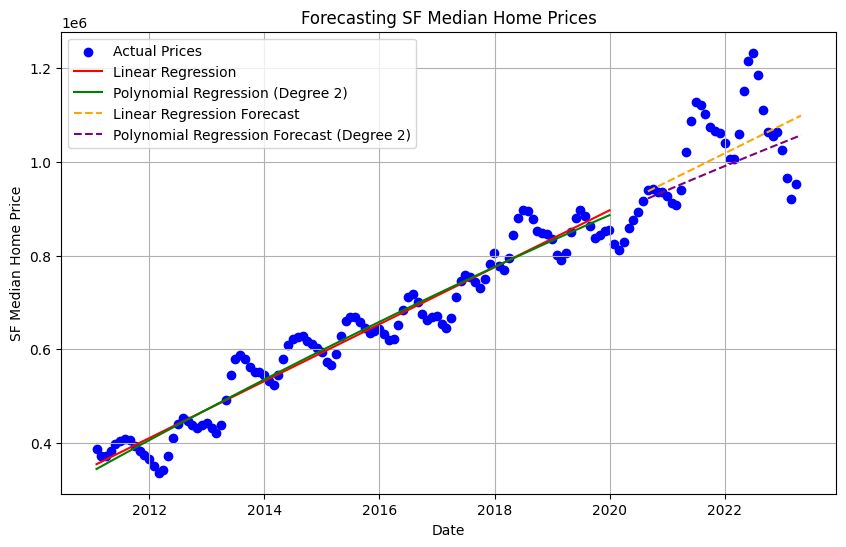

Linear Regression Forecasted Prices:
SF Median Home price for 2020-08-31 00:00:00 is 937425.76 using Linear Regression
SF Median Home price for 2021-04-30 00:00:00 is 977705.17 using Linear Regression
SF Median Home price for 2021-12-31 00:00:00 is 1018483.91 using Linear Regression
SF Median Home price for 2022-08-31 00:00:00 is 1058929.77 using Linear Regression
SF Median Home price for 2023-04-30 00:00:00 is 1099209.18 using Linear Regression

Polynomial Regression (Degree 2) Forecasted Prices:
SF Median Home price for 2020-08-31 00:00:00 is 922218.88 using Polynomial Regression (Degree 2)
SF Median Home price for 2021-04-30 00:00:00 is 956869.86 using Polynomial Regression (Degree 2)
SF Median Home price for 2021-12-31 00:00:00 is 991254.52 using Polynomial Regression (Degree 2)
SF Median Home price for 2022-08-31 00:00:00 is 1024666.88 using Polynomial Regression (Degree 2)
SF Median Home price for 2023-04-30 00:00:00 is 1057257.20 using Polynomial Regression (Degree 2)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# Read the data into a pandas dataframe
df = pd.read_csv('/content/521939403_Median_Sale_Price-3_12_7134107131551656.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Filter date range
start_date = pd.to_datetime('2011-01-31')
end_date = pd.to_datetime('2019-12-31')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Prepare the training data
X_train = filtered_df['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y_train = filtered_df['SF Median'].values

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_lin_pred = linear_model.predict(X_train)
r_squared_lin = r2_score(y_train, y_lin_pred)
print("R-squared using Linear Regression:", r_squared_lin)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_poly_pred = poly_model.predict(X_poly)
r_squared_poly = r2_score(y_train, y_poly_pred)
print("R-squared using Polynomial Regression (Degree 2):", r_squared_poly)

# Prepare the prediction dates
prediction_dates = pd.to_datetime(['2020-08-31', '2021-04-30', '2021-12-31', '2022-08-31', '2023-04-30'])
X_fcst = prediction_dates.map(lambda x: x.timestamp()).values.reshape(-1, 1)

# Make predictions using linear regression
y_lin_fcst = linear_model.predict(X_fcst)

# Make predictions using polynomial regression
X_poly_fcst = poly_features.transform(X_fcst)
y_poly_fcst = poly_model.predict(X_poly_fcst)

# Visualize the forecasting results
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['SF Median'], label='Actual Prices', color='blue')
plt.plot(filtered_df['Date'], y_lin_pred, label='Linear Regression', color='red')
plt.plot(filtered_df['Date'], y_poly_pred, label='Polynomial Regression (Degree 2)', color='green')
plt.plot(prediction_dates, y_lin_fcst, 'r--', label='Linear Regression Forecast', color='orange')
plt.plot(prediction_dates, y_poly_fcst, 'g--', label='Polynomial Regression Forecast (Degree 2)', color='purple')
plt.xlabel('Date')
plt.ylabel('SF Median Home Price')
plt.title('Forecasting SF Median Home Prices')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted prices
print("Linear Regression Forecasted Prices:")
for date, prediction in zip(prediction_dates, y_lin_fcst):
    print(f"SF Median Home price for {date} is {prediction:.2f} using Linear Regression")

print("\nPolynomial Regression (Degree 2) Forecasted Prices:")
for date, prediction in zip(prediction_dates, y_poly_fcst):
    print(f"SF Median Home price for {date} is {prediction:.2f} using Polynomial Regression (Degree 2)")


R-squared using Linear Regression: 0.9425328373993557
R-squared using Polynomial Regression (Degree 2): 0.9433663044914395


<ipython-input-34-0dbb77c1e4d3>:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(prediction_dates, y_lin_fcst, 'r--', label='Linear Regression Forecast', color='orange')
<ipython-input-34-0dbb77c1e4d3>:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(prediction_dates, y_poly_fcst, 'g--', label='Polynomial Regression Forecast (Degree 2)', color='purple')


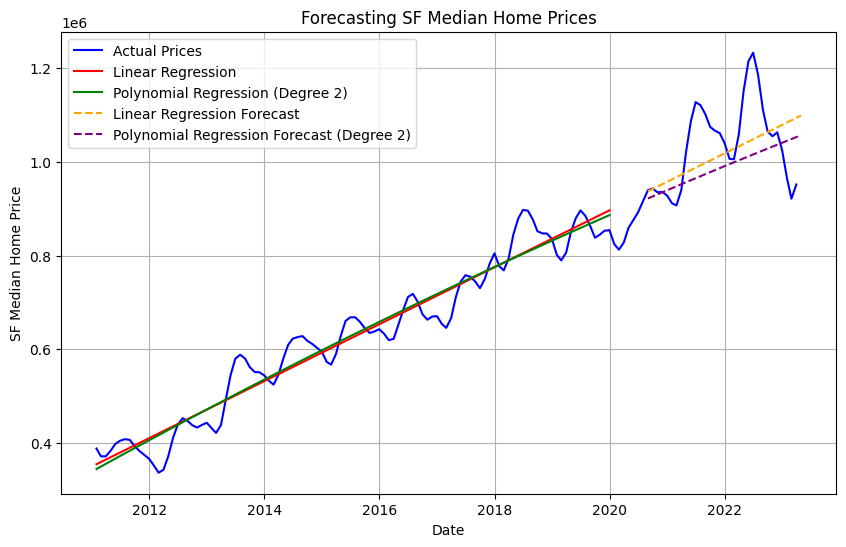

Linear Regression Forecasted Prices:
SF Median Home price for 2020-08-31 00:00:00 is 937425.76 using Linear Regression
SF Median Home price for 2021-04-30 00:00:00 is 977705.17 using Linear Regression
SF Median Home price for 2021-12-31 00:00:00 is 1018483.91 using Linear Regression
SF Median Home price for 2022-08-31 00:00:00 is 1058929.77 using Linear Regression
SF Median Home price for 2023-04-30 00:00:00 is 1099209.18 using Linear Regression

Polynomial Regression (Degree 2) Forecasted Prices:
SF Median Home price for 2020-08-31 00:00:00 is 922218.88 using Polynomial Regression (Degree 2)
SF Median Home price for 2021-04-30 00:00:00 is 956869.86 using Polynomial Regression (Degree 2)
SF Median Home price for 2021-12-31 00:00:00 is 991254.52 using Polynomial Regression (Degree 2)
SF Median Home price for 2022-08-31 00:00:00 is 1024666.88 using Polynomial Regression (Degree 2)
SF Median Home price for 2023-04-30 00:00:00 is 1057257.20 using Polynomial Regression (Degree 2)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# Read the data into a pandas dataframe
df = pd.read_csv('/content/521939403_Median_Sale_Price-3_12_7134107131551656.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Filter date range
start_date = pd.to_datetime('2011-01-31')
end_date = pd.to_datetime('2019-12-31')
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Prepare the training data
X_train = filtered_df['Date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y_train = filtered_df['SF Median'].values

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_lin_pred = linear_model.predict(X_train)
r_squared_lin = r2_score(y_train, y_lin_pred)
print("R-squared using Linear Regression:", r_squared_lin)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_poly_pred = poly_model.predict(X_poly)
r_squared_poly = r2_score(y_train, y_poly_pred)
print("R-squared using Polynomial Regression (Degree 2):", r_squared_poly)

# Prepare the prediction dates
prediction_dates = pd.to_datetime(['2020-08-31', '2021-04-30', '2021-12-31', '2022-08-31', '2023-04-30'])
X_fcst = prediction_dates.map(lambda x: x.timestamp()).values.reshape(-1, 1)

# Make predictions using linear regression
y_lin_fcst = linear_model.predict(X_fcst)

# Make predictions using polynomial regression
X_poly_fcst = poly_features.transform(X_fcst)
y_poly_fcst = poly_model.predict(X_poly_fcst)

# Visualize the forecasting results
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['SF Median'], label='Actual Prices', color='blue')
plt.plot(filtered_df['Date'], y_lin_pred, label='Linear Regression', color='red')
plt.plot(filtered_df['Date'], y_poly_pred, label='Polynomial Regression (Degree 2)', color='green')
plt.plot(prediction_dates, y_lin_fcst, 'r--', label='Linear Regression Forecast', color='orange')
plt.plot(prediction_dates, y_poly_fcst, 'g--', label='Polynomial Regression Forecast (Degree 2)', color='purple')
plt.xlabel('Date')
plt.ylabel('SF Median Home Price')
plt.title('Forecasting SF Median Home Prices')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted prices
print("Linear Regression Forecasted Prices:")
for date, prediction in zip(prediction_dates, y_lin_fcst):
    print(f"SF Median Home price for {date} is {prediction:.2f} using Linear Regression")

print("\nPolynomial Regression (Degree 2) Forecasted Prices:")
for date, prediction in zip(prediction_dates, y_poly_fcst):
    print(f"SF Median Home price for {date} is {prediction:.2f} using Polynomial Regression (Degree 2)")


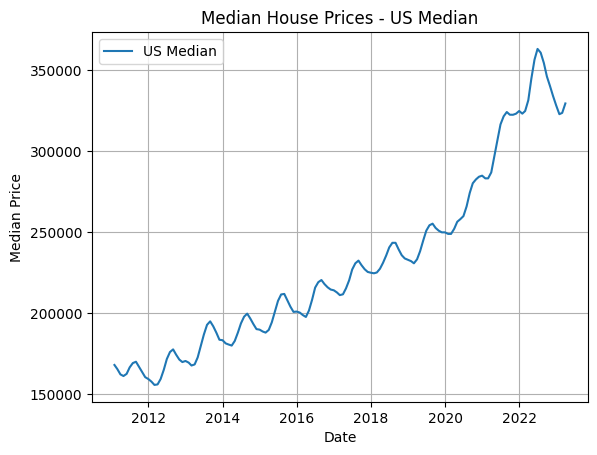

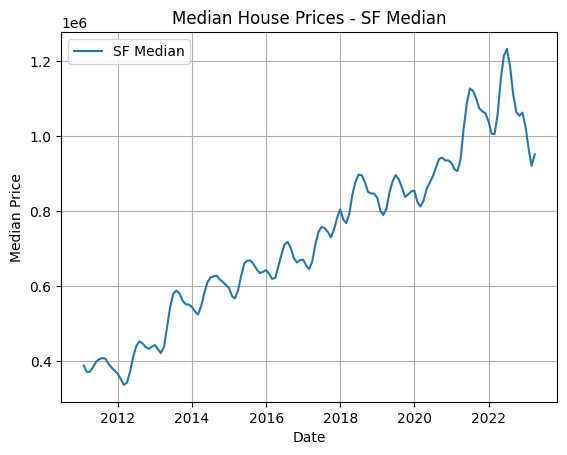

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV into a pandas DataFrame
df = pd.read_csv('/content/521939403_Median_Sale_Price-3_12_7134107131551656.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the 'US Median' column
plt.plot(df.index, df['US Median'], label='US Median')

plt.xlabel('Date')
plt.ylabel('Median Price')
plt.title('Median House Prices - US Median')
plt.legend()
plt.grid(True)
plt.show()

# Plot the 'SF Median' column
plt.plot(df.index, df['SF Median'], label='SF Median')

plt.xlabel('Date')
plt.ylabel('Median Price')
plt.title('Median House Prices - SF Median')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


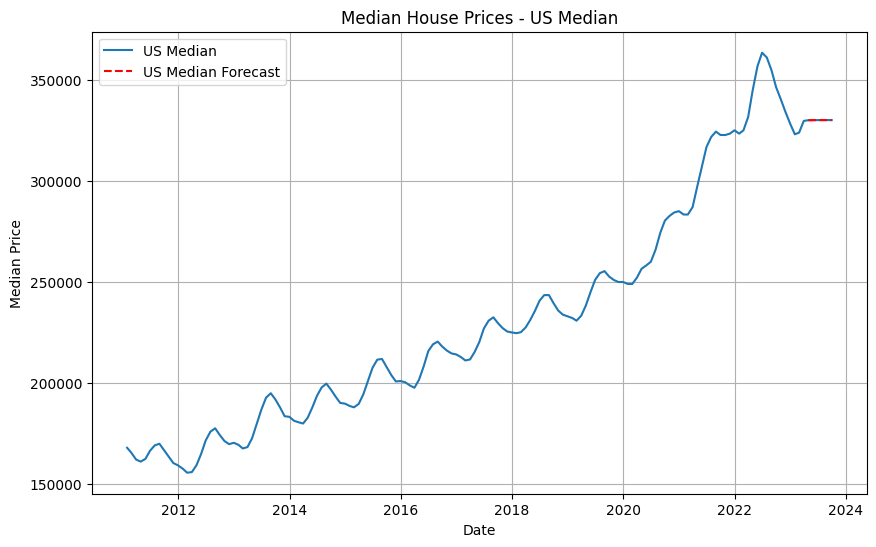

Forecasted values:
2023-04-30    329953.579025
2023-05-31    330009.431821
2023-06-30    330019.162760
2023-07-31    330020.858130
2023-08-31    330021.153506
2023-09-30    330021.204968
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
# read the data into a pandas dataframe
df = pd.read_csv('/content/521939403_Median_Sale_Price-3_12_7134107131551656.csv')
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Forecast using ARIMA model
def forecast_arima(data, column):
    model = ARIMA(data[column], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.predict(
        start=len(data),
        end=len(data) + 5,
        typ='levels'
    )
    return forecast

# Forecast and plot the "US Median" column
column = "US Median"
forecast = forecast_arima(df, column)
df_forecast = pd.concat([df, pd.DataFrame({column: forecast})])

plt.figure(figsize=(10, 6))
plt.plot(df_forecast.index, df_forecast[column], label=column)
plt.plot(df_forecast.index[-len(forecast):], forecast, 'r--', label=f'{column} Forecast')

plt.xlabel('Date')
plt.ylabel('Median Price')
plt.title('Median House Prices - US Median')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values
print("Forecasted values:")
print(forecast)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


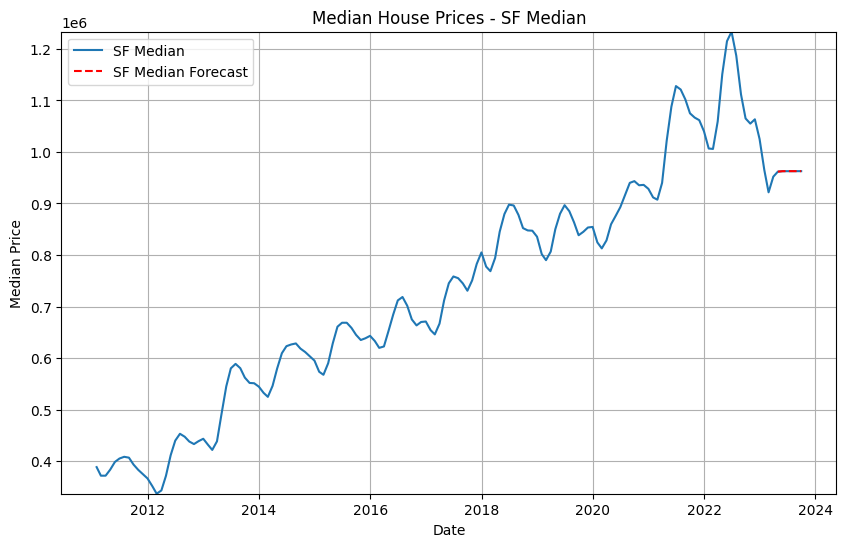

Forecasted values:
2023-04-30    961788.686438
2023-05-31    962630.845606
2023-06-30    962703.299869
2023-07-31    962709.533394
2023-08-31    962710.069689
2023-09-30    962710.115829
Freq: M, Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read the data from CSV into a pandas DataFrame
df = pd.read_csv('/content/521939403_Median_Sale_Price-3_12_7134107131551656.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Forecast using ARIMA model
def forecast_arima(data, column):
    model = ARIMA(data[column], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.predict(
        start=len(data),
        end=len(data) + 5,
        typ='levels'
    )
    return forecast

# Forecast and plot the "SF Median" column
column = "SF Median"
forecast = forecast_arima(df, column)
df_forecast = pd.concat([df, pd.DataFrame({column: forecast})])

plt.figure(figsize=(10, 6))
plt.plot(df_forecast.index, df_forecast[column], label=column)
plt.plot(df_forecast.index[-len(forecast):], forecast, 'r--', label=f'{column} Forecast')

# Adjust y-axis limits based on data
min_value = min(df[column].min(), forecast.min())
max_value = max(df[column].max(), forecast.max())
plt.ylim(min_value, max_value)

plt.xlabel('Date')
plt.ylabel('Median Price')
plt.title('Median House Prices - SF Median')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values
print("Forecasted values:")
print(forecast)
